In [179]:
from GeneralLinearModel import GeneralLinearModel
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, metrics, datasets
import numpy as np

To test the viability of the general linear model, we can see how it performs against sklearn's linear model for regression and logistic regression model for classification.  We can also test for poison regression.  Sklearn is of course expected to perform better considering it's a highly refined, perfesional software package, but if it performs with good accuracy, it can still be a good indication of viability.  

For linear regression, we can look at happieness data and see if we can create a model that will predict a country's happiness from social metrics.  We can perhaps pull feature importance to see what social metrics will lead to greater happiness scores.

In [180]:
happiness_data = pd.read_csv("2019.csv")

In [181]:
happiness_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [182]:
happiness_data_clean = happiness_data.drop(columns=["Overall rank", "Country or region"])

In [183]:
happiness_train, happiness_test = model_selection.train_test_split(happiness_data_clean, train_size = 70, test_size = 30)

In [184]:
happiness_test_target = happiness_test["Score"]
happiness_test = happiness_test.drop(columns = ["Score"])

In [185]:
happinessGLM = GeneralLinearModel(happiness_data_clean, "linear", "Score")

In [186]:
happiness_test.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
129,0.949,1.265,0.831,0.470,0.244,0.047
134,0.811,1.149,0.000,0.313,0.074,0.135
7,1.303,1.557,1.026,0.585,0.330,0.380
88,0.801,0.782,0.782,0.418,0.036,0.076
23,1.324,1.472,1.045,0.436,0.111,0.183


In [187]:
predictions = happinessGLM.predict(happiness_test)

In [188]:
dict(zip(happiness_train.drop(columns=["Score"]).columns,happinessGLM.parameters))

{'GDP per capita': 0.2421164486046162,
 'Social support': 2.2905868334494532,
 'Healthy life expectancy': 1.6648386150024461,
 'Freedom to make life choices': 1.7489125903280316,
 'Generosity': 1.9910136320568634,
 'Perceptions of corruption': 0.7550614070692311}

In [189]:
dict(zip(happiness_train.drop(columns= ["Score"]).columns, happinessGLM.standard_errors))

{'GDP per capita': 0.2539102624700309,
 'Social support': 0.23465048742879083,
 'Healthy life expectancy': 0.39764382314485003,
 'Freedom to make life choices': 0.45399847575836205,
 'Generosity': 0.5653372127520436,
 'Perceptions of corruption': 0.6580954316762373}

In [190]:
happiness_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [191]:
linear_regressor = linear_model.LinearRegression()
happiness_linear_model = linear_regressor.fit(happiness_train.drop(columns=["Score"]), happiness_train["Score"])
sklearn_predictions = happiness_linear_model.predict(happiness_test)

In [192]:
dict(zip(happiness_train.drop(columns=["Score"]).columns,happiness_linear_model.coef_))

{'GDP per capita': 1.081667110977542,
 'Social support': 0.9859422243065186,
 'Healthy life expectancy': 0.6115111155841597,
 'Freedom to make life choices': 1.6421828832167953,
 'Generosity': 1.102151074629526,
 'Perceptions of corruption': 1.3249540281632728}

In [193]:
coefs = [happiness_linear_model.coef_, happinessGLM.parameters]
coefs

[array([1.08166711, 0.98594222, 0.61151112, 1.64218288, 1.10215107,
        1.32495403]),
 array([0.24211645, 2.29058683, 1.66483862, 1.74891259, 1.99101363,
        0.75506141])]

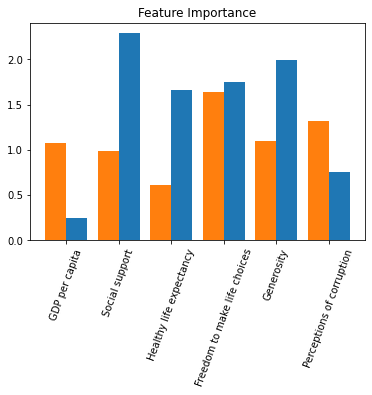

In [194]:
x = np.arange(len(happinessGLM.parameters))
plt.bar(x + .2,np.abs(happinessGLM.parameters),.4)
plt.bar(x - .2, np.abs(happiness_linear_model.coef_),.4)
plt.xticks(x, labels=happiness_train.drop(columns = ["Score"]).columns, rotation = 70)
plt.title("Feature Importance")
plt.show()

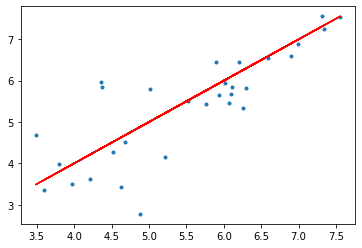

In [195]:
plt.plot(happiness_test_target, predictions,".")
plt.plot(happiness_test_target,happiness_test_target,"r-")

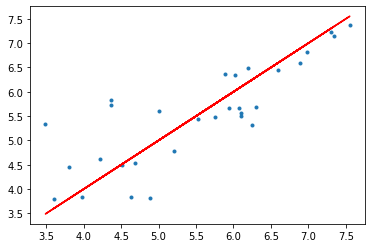

In [196]:
plt.plot(happiness_test_target, sklearn_predictions,".")
plt.plot(happiness_test_target,happiness_test_target, "r-")


In [197]:
np.sqrt(metrics.mean_squared_error(happiness_test_target, predictions))

0.7542502577299784

In [198]:
np.sqrt(metrics.mean_squared_error(happiness_test_target, sklearn_predictions))

0.6635474162730035

After running a few times, it seems like while sklearn is more stable, the genearl linear model sometimes performs better, but also sometimes performs worse with rmse.  Next lets look at the sklearn iris dataset for classification.

In [199]:
iris = datasets.load_iris(as_frame=True)

In [200]:
iris_data = iris["data"]
iris_target = iris["target"]

In [201]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
iris_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [203]:
iris_target.unique()

array([0, 1, 2])

In [204]:
iris_data = iris_data[iris_target != 2]

In [205]:
iris_target = iris_target[iris_target != 2]

In [206]:
iris_data = iris_data.join(iris_target)

In [207]:
iris_train, iris_test = model_selection.train_test_split(iris_data, train_size = .7, test_size = .3)

In [208]:
iris_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
26,5.0,3.4,1.6,0.4,0
20,5.4,3.4,1.7,0.2,0
42,4.4,3.2,1.3,0.2,0


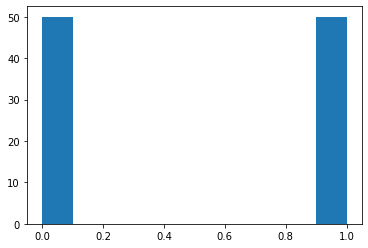

In [209]:
plt.hist(iris_target)
plt.show()

In [210]:
irisGLM = GeneralLinearModel(iris_train, "logistic", "target", param_init=[-1,1,-1,1], max_itter=500)
irisGLM.parameters

Has not converged, has reached max itteration, will return most recent parameters


array([-0.7029746 , -0.90019903,  1.30970143,  3.79543044])

In [211]:
iris_test_target = iris_test["target"]
iris_test = iris_test.drop(columns=["target"])

In [212]:
iris_prediction_probs = irisGLM.predict(iris_test)

In [213]:
iris_predictions = np.round(iris_prediction_probs)

In [214]:
metrics.confusion_matrix(iris_test_target, iris_predictions)

array([[19,  0],
       [ 0, 11]], dtype=int64)

In [216]:
print(metrics.classification_report(iris_test_target, iris_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Despite not having converged after 500 itterations, the logistic model still managed to perfectly fit the test set